In [3]:
import matplotlib.pyplot as plt
import numpy as np

## Cosine Learning Rate Policy
https://arxiv.org/pdf/1608.03983.pdf


In [2]:
import math
def lr_func_cosine(cur_epoch, max_epoch, base_lr, end_lr):
    """
    Retrieve the learning rate to specified values at specified epoch with the
    cosine learning rate schedule. Details can be found in:
    Ilya Loshchilov, and  Frank Hutter
    SGDR: Stochastic Gradient Descent With Warm Restarts.
    Args:
        cfg (CfgNode): configs. Details can be found in
            slowfast/config/defaults.py
        cur_epoch (float): the number of epoch of the current training stage.
    """
    assert end_lr < base_lr
    return (
        end_lr
        + (base_lr - end_lr)
        * (math.cos(math.pi * cur_epoch / max_epoch) + 1.0)
        * 0.5
    )

In [28]:
max_epoch = 5
base_lr = 0.1
end_lr = 0.001
epochs = np.linspace(0,4*max_epoch,320)
vec_cosine_lr = np.vectorize(lr_func_cosine)
lr_vals = vec_cosine_lr(epochs, max_epoch, base_lr, end_lr)

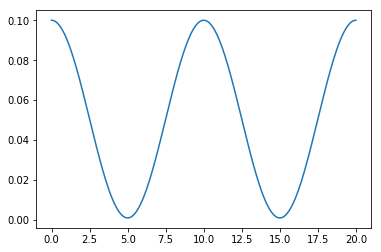

In [29]:
fig = plt.figure()
ax = plt.axes()

ax.plot(epochs, lr_vals);